<a href="https://colab.research.google.com/github/agikarasugi/tutorial-face-recognition/blob/master/Face_recog_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FACE RECOGNITION TUTORIAL

Dalam tutorial ini, anda akan diajarkan kode untuk mendeteksi dan mengenal wajah dari dataset yang telah diberikan.

## Bagian 1: Mempersiapkan Data

Sebelum kita mengupload file, mari kita lihat file-file yang berada pada directory/folder aktif dengan menggunakan perintah "!ls". Anda juga dapat melihat isi directory dengan menggunakan sidebar dikiri pada tab Files.

Saat perintah !ls pertama kali dijalankan, seharusnya hanya terdapat folder "sample_data".

In [1]:
!ls

sample_data


Kemudian kita akan mengupload file dataset serta model classifier deteksi wajah dengan kode dibawah, maupun dengan menggunakan fitur upload pada sidebar. Saat "upload.zip" telah diupload, seharusnya anda dapat melihat "upload.zip" saat menjalankan perintah !ls diatas maupun pada sidebar Files

In [2]:
from google.colab import files
uploaded = files.upload()

Saving upload.zip to upload.zip


Kita perlu mengekstrak "upload.zip" terlebih dahulu. Perintah "!unzip [NAMA_FILE]" digunakan untuk mengekstrak suatu file .zip. Jalankan perintah dibawah untuk mengekstrak "upload.zip"

In [3]:
!unzip upload.zip

Archive:  upload.zip
   creating: dataset/
  inflating: dataset/.DS_Store       
  inflating: dataset/._.DS_Store     
   creating: dataset/test/
  inflating: dataset/test/1.jpg      
  inflating: dataset/test/2.jpg      
  inflating: dataset/test/200.jpg    
   creating: dataset/train/
   creating: dataset/train/felix/
  inflating: dataset/train/felix/1.jpg  
  inflating: dataset/train/felix/2.jpg  
  inflating: dataset/train/felix/3.jpg  
 extracting: dataset/train/felix/4.jpg  
  inflating: dataset/train/felix/5.jpg  
  inflating: dataset/train/felix/6.jpg  
  inflating: dataset/train/felix/7.jpg  
   creating: dataset/train/jonas/
  inflating: dataset/train/jonas/1.jpg  
  inflating: dataset/train/jonas/2.jpg  
  inflating: dataset/train/jonas/3.jpg  
  inflating: dataset/train/jonas/4.jpg  
  inflating: dataset/train/jonas/5.jpg  
  inflating: dataset/train/jonas/6.jpg  
 extracting: dataset/train/jonas/7.jpg  
   creating: dataset/train/nayeon/
  inflating: dataset/train/nayeon/1

"upload.zip" akan terekstrak dengan struktur sebagai berikut:

```
-haarcascade_frontalface_default.xml
|-dataset
   |- test
      - 1.jpg
      - 2.jpg
      - 3.jpg
   |- train
      |- felix
         - 1.jpg
         - ...
      |- jonas
         - 1.jpg
         - ...
      |- nayeon
         - 1.jpg
         - ...
```
File haarcascade_frontalface_default.xml adalah model classifier haar cascade yang sudah dilatih untuk mendeteksi wajah

Folder dataset berisi:

* Folder train: berisi folder nama orang yang berisi gambar-gambar dari wajah orang tersebut. Gambar yang dikelompokkan ini akan digunakan dalam training model kNN (supervised machine learning) untuk memprediksi wajah yang dideteksi nanti

* Folder test: berisi gambar yang akan dideteksi dan dikenali wajahnya


## Bagian 2: Training

Pertama-tama kita akan mengimport/memakai library (modul/pustaka kode-kode) terlebih dahulu untuk memakai alat-alat yang sudah ada


*   Numpy: berisi kontainer array multi-dimensional & matriks, serta fungsi-fungsi matematika untuk dioperasikan pada array tsb.
*   cv2: library perangkat lunak yang ditujukan untuk pengolahan citra dinamis (computer vision) secara real-time.
* os: library bawaan python untuk operasi dalam os (copy, delete, liat directory, dll).
* math: menyediakan akses ke fungsi matematika yang ditentukan oleh standar bahasa C.


In [0]:
import numpy as np
import cv2
import os
import math

from google.colab.patches import cv2_imshow

Kemudian kita akan muat classifier haarcascade_frontalface_default.xml pada variabel "face_cascade" ...

In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

... serta membuat variabel "face_detect_object" sebagai  objek LBPH Face Recognizer

In [0]:
face_detect_object = cv2.face.LBPHFaceRecognizer_create()

Sekarang, kita akan menginisialisasikan beberapa variabel

In [0]:
# Folder tempat data training
train_path = 'dataset/train'

# Kode untuk menampung label (nama orang) dari nama folder yang ada
person_names = os.listdir(train_path)

# Inisialisasi variabel untuk menampung gambar muka dan label muka
train_faces = []
train_labels = []

Kemudian kita akan membuat kode untuk membaca file gambar dan mendeteksi wajah untuk nantinya digunakan pada training model

In [0]:
# Perulangan/looping pertama untuk setiap folder orang
for i, name in enumerate(person_names):
    
    # Tampung alamat folder tersebut pada variabel person_images
    person_images = os.listdir(train_path + '/' + name)

    # Looping kedua untuk setiap gambar di alamat "person_images" 
    for image in person_images:
      
        # Tampung alamat lengkap dari suatu gambar
        image_full_path = train_path + '/' + name + '/' + image

        # Baca gambar tersebut sebagai grayscale (bentuk matriks 2D)
        face_gray = cv2.imread(image_full_path, 0)

        # Deteksi wajah yang ada di gambar menggunakan 
        # classifier yang telah dimuat.
        #
        # Wajah yang terdeteksi ditampung dalam variabel list "detected_face"
        detected_face = face_cascade.detectMultiScale(face_gray, scaleFactor=1.2, minNeighbors=5)

        # Kondisi jika wajah yang dideteksi kurang dari 1 (tidak ada wajah),
        # maka proses dibawah akan dilewati
        if len(detected_face) < 1:
            continue

        # Untuk setiap wajah yang terdeteksi/terdapat pada "detected_face"
        for face in detected_face:
          
            # Tampung koordinat wajah
            x, y, w, h = face
            
            # Crop wajah dari gambar
            face_rect = face_gray[y:y+h, x:x+w]

            # Tambahkan gambar dan label wajah 
            # pada variabel yang telah kita buat
            train_faces.append(face_rect)
            train_labels.append(i)

Setelah semua gambar wajah dan labelnya yang akan di-train telah ditampung, maka saatnya kita membuat dan melatih model face recognizer

In [0]:
face_detect_object.train(train_faces, np.array(train_labels))

Voila! Sekarang kita memiliki model "face_detect_object" yang dapat digunakan untuk mengenali wajah!

## Bagian 3: Testing

Pertama-tama kita akan membuat variabel yang menampung alamat folder test

In [0]:
test_path = 'dataset/test'

Kemudian kita akan membuat kode untuk membaca gambar test untuk dikenali wajahnya

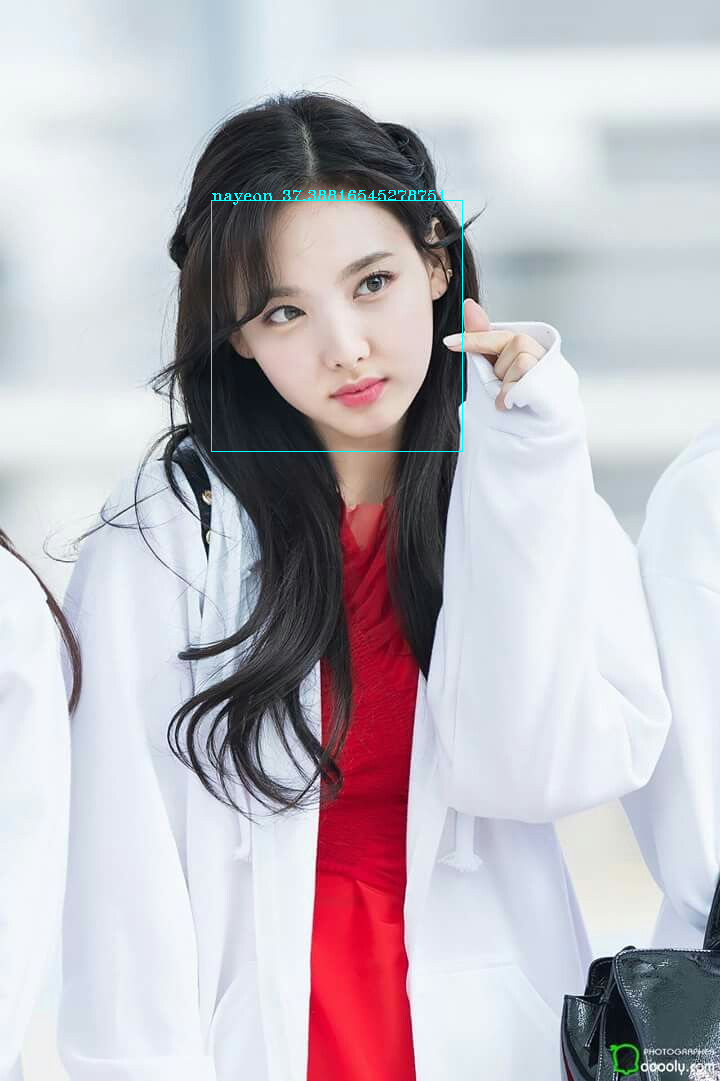

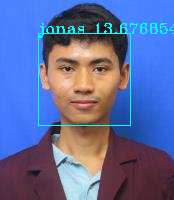

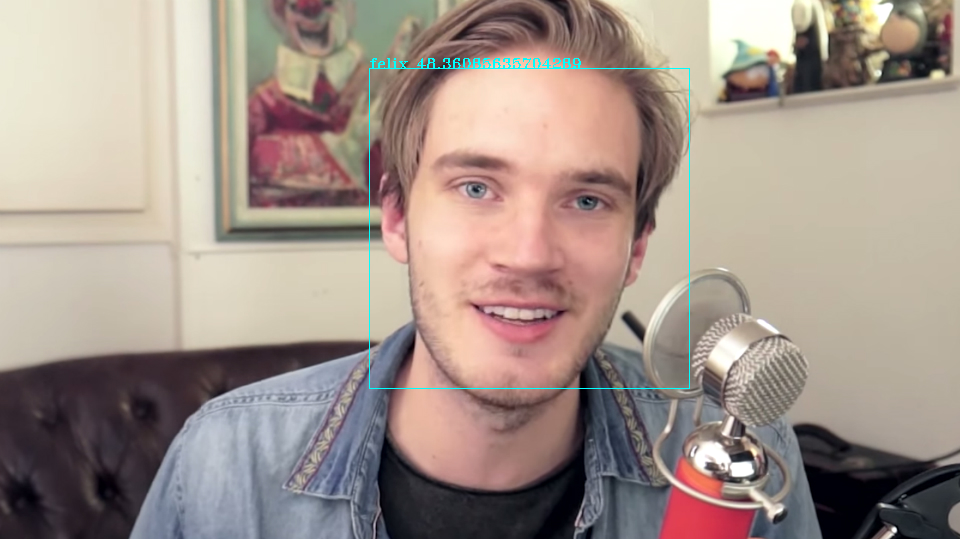

In [14]:
# Looping pertama untuk setiap gambar pada folder test
for images in os.listdir(test_path):
  
    # Baca gambar tsb sebagai grayscale
    face_gray = cv2.imread(test_path + '/' + images, 0)
    
    # Baca gambar tsb sebagai BGR
    face_bgr = cv2.imread(test_path + '/' + images)
    
    # Deteksi gambar yang ada pada foto tersebut
    detected_face = face_cascade.detectMultiScale(face_gray, scaleFactor=1.2, minNeighbors=5)

    # Kondisi jika wajah yang dideteksi kurang dari 1 (tidak ada wajah),
    # maka proses dibawah akan dilewati
    if len(detected_face) < 1:
        continue

    # Looping kedua untuk setiap wajah yang terdeteksi
    for face in detected_face:
      
        # Tampung koordinat wajah
        x, y, w, h = face
        
        # Crop wajah dari gambar
        face_rect = face_gray[y:y+h, x:x+w]

        # Prediksi wajah siapa menggunakan model yang telah kita buat pada
        # bagian training
        res, confidence = face_detect_object.predict(face_rect)

        # Anotasikan gambar dengan kotak yang menunjukkan wajah serta
        # hasil prediksi wajah
        cv2.rectangle(face_bgr, (x, y), (x+w, y+h), (255, 255, 0), 1)
        text = person_names[res] + ' ' + str(100-confidence)
        cv2.putText(face_bgr, text, (x, y), 4, 0.5, (255, 255, 0))

        # Tampilkan gambar wajah test
        cv2_imshow(face_bgr)